<a href="https://colab.research.google.com/github/FranciscoRamirezRuiz/Inferencia2024/blob/main/notebooks/01_limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Paso 1: Descargar el archivo desde GitHub al entorno local
!wget -O Housing.xlsx "https://github.com/FranciscoRamirezRuiz/Inferencia2024/raw/main/data/Housing.xlsx"

# Paso 2: Cargar el archivo
import pandas as pd

df = pd.read_excel("Housing.xlsx")
df.head()


--2025-05-27 20:16:40--  https://github.com/FranciscoRamirezRuiz/Inferencia2024/raw/main/data/Housing.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FranciscoRamirezRuiz/Inferencia2024/main/data/Housing.xlsx [following]
--2025-05-27 20:16:40--  https://raw.githubusercontent.com/FranciscoRamirezRuiz/Inferencia2024/main/data/Housing.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271960 (2.2M) [application/octet-stream]
Saving to: ‘Housing.xlsx’

Housing.xlsx        100%[===================>]   2.17M  --.-KB/s    in 0.01s   

2025-05-27 20:16:40 (194 MB/s) - ‘Housing.xlsx’ saved [22719

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20140916T000000,280000,6,3.00,2400,9373,2.0,0,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1000102,20150422T000000,300000,6,3.00,2400,9373,2.0,0,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,1200019,20140508T000000,647500,4,1.75,2060,26036,1.0,0,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,1200021,20140811T000000,400000,3,1.00,1460,43000,1.0,0,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,2800031,20150401T000000,235000,3,1.00,1430,7599,1.5,0,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [6]:
# 🔹 Cargar librerías necesarias
import pandas as pd
import numpy as np

# 🔹 Cargar el dataset (ya descargado previamente)
df = pd.read_excel("Housing.xlsx")

# 🔹 Revisión general
print(" Dimensiones del dataset:", df.shape)
print("\n Nombres de columnas y tipos de datos:")
print(df.dtypes)

print("\n Primeras 5 filas del dataset:")
display(df.head())

# 🔹 Verificar valores nulos
print("\n Valores nulos por columna:")
print(df.isnull().sum())

# 🔹 Ver columnas con valores únicos (por si hay alguna inútil)
print("\n Columnas con un solo valor único (posiblemente descartables):")
print([col for col in df.columns if df[col].nunique() == 1])


 Dimensiones del dataset: (21613, 18)

 Nombres de columnas y tipos de datos:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

 Primeras 5 filas del dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20140916T000000,280000,6,3.00,2400,9373,2.0,0,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1000102,20150422T000000,300000,6,3.00,2400,9373,2.0,0,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,1200019,20140508T000000,647500,4,1.75,2060,26036,1.0,0,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,1200021,20140811T000000,400000,3,1.00,1460,43000,1.0,0,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,2800031,20150401T000000,235000,3,1.00,1430,7599,1.5,0,1010,420,1930,0,98168,47.4783,-122.265,1290,10320



 Valores nulos por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 Columnas con un solo valor único (posiblemente descartables):
[]


In [13]:
import pandas as pd

# Cargar dataset
df = pd.read_excel("Housing.xlsx")

# Mostrar cantidad y porcentaje de nulos
nulos_abs = df.isnull().sum()
nulos_pct = (nulos_abs / len(df)) * 100

df_nulos = pd.DataFrame({
    'Valores nulos': nulos_abs,
    'Porcentaje (%)': nulos_pct.round(2)
})

df_nulos = df_nulos[df_nulos['Valores nulos'] > 0]
display(df_nulos)


,Valores nulos,Porcentaje (%)


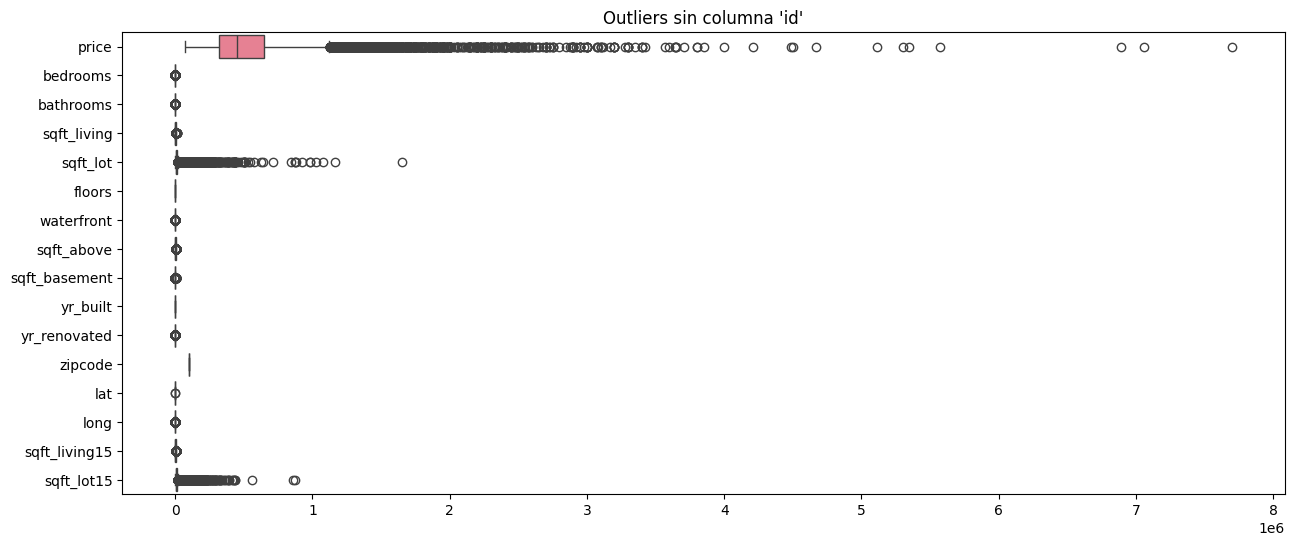

In [15]:
# Eliminamos 'id' para un análisis más claro
df_num = df.drop(columns=['id']).select_dtypes(include=['int64', 'float64'])

# Boxplot sin 'id'
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_num, orient="h")
plt.title("Outliers sin columna 'id'")
plt.show()


In [16]:
# Detección de outliers usando IQR
def detectar_outliers_iqr(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Ejemplo: ver outliers de la variable 'price'
outliers_price = detectar_outliers_iqr('price')
print(f"Cantidad de outliers en 'price': {len(outliers_price)}")
display(outliers_price[['price']])


Cantidad de outliers en 'price': 1159


,price
50,1490000
72,1510000
73,1730000
74,2030000
109,1430000
...,...
21561,1390000
21566,2250000
21567,1450000
21570,2480000


In [17]:
print("Tipos de datos:\n", df.dtypes)
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")


Tipos de datos:
 id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Valores únicos por columna:
id: [1000102 1200019 1200021 2800031 3600057]
date: ['20140916T000000' '20150422T000000' '20140508T000000' '20140811T000000'
 '20150401T000000']
price: [280000 300000 647500 400000 235000]
bedrooms: [6 4 3 5 2]
bathrooms: [3.   1.75 1.   2.   2.75]
sqft_living: [2400 2060 1460 1430 1650]
sqft_lot: [ 9373 26036 43000  7599  3504]
floors: [2.  1.  1.5 3.  2.5]
waterfront: [0 1]
sqft_above: [2400 1160 1460 1010  760]
sqft_basement: [   0  900  420  890 1050]
yr_built: [1991 1947 1952 1930

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalizado = df.copy()

cols_num = df.select_dtypes(include=['int64', 'float64']).columns
df_normalizado[cols_num] = scaler.fit_transform(df[cols_num])
